In [1]:
!pip3 install keras_ocr

In [2]:
!pip3 install ipynb

In [3]:
import cv2
import math
import numpy
import keras_ocr
from PIL import Image
from matplotlib import pyplot as plt
from image_resize import resize_image
from keras.models import model_from_json

.

# Font Extractor

In [4]:
with open('models/fannet.json', 'r') as fp:
    NET_F = model_from_json(fp.read())
with open('models/colornet.json', 'r') as fp:
    NET_C = model_from_json(fp.read())
    
NET_F.load_weights('models/fannet_weights.h5')
NET_C.load_weights('models/colornet_weights.h5')

In [41]:
def sort_points(points):
    points = sorted(points, key=lambda x: x[1])
    points = sorted(points[:2], key=lambda x: x[0]) + \
             sorted(points[2:], key=lambda x: x[0], reverse=True)
    return points

In [42]:
sort_points([(125,10),(1100, 10),(1100, 100),(125, 100)])

[(125, 10), (1100, 10), (1100, 100), (125, 100)]

In [43]:
def draw_region(image, points):
    output = image.copy()
    points = sort_points(points)
    npoint = len(points)
    for i in range(npoint):
        cv2.line(output, points[i], points[(i + 1) % npoint], (0, 0, 255), 1, cv2.LINE_AA)
    for i in range(npoint):
        cv2.circle(output, points[i], 5, (0, 0, 0), -1, cv2.LINE_AA)
        cv2.circle(output, points[i], 4, (0, 255, 0), -1, cv2.LINE_AA)
    return output

In [44]:
def extract_roi(image, points):
    sp = sort_points(points)
    return image[sp[0][1]:sp[2][1], sp[0][0]:sp[2][0]]

For now Input four points are hard-coded.
When a GUI will be developed : Points can be taken input as mouse selects the area .

In [45]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

input_text = "SOME RANDOM TEXT HERE"

thresh = 150
cntmin = 25
index = 0

In [46]:
img = cv2.imread('Images/text-font.png')

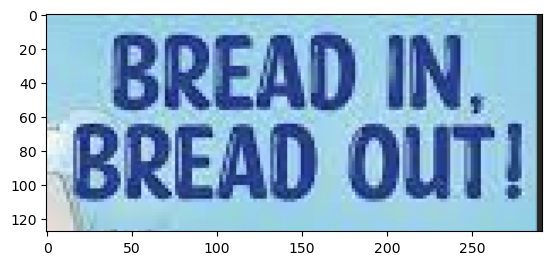

In [47]:
image_edit = img.copy()
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image_mask = binarize(image_gray, [], thresh, 255, 1)
contours, bndboxes = find_contours(image_mask, cntmin)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


image_mask, image_edit = 
edit_char(image_edit, image_mask, contours, bndboxes, cntidx, 'W', 'ABCDEFGHIJKLMNOPQRSTUVWXYZ', NET_F, NET_C)
edit_char(image, image_mask, contours, bndboxes, index, char, alphabet, fannet, colornet):

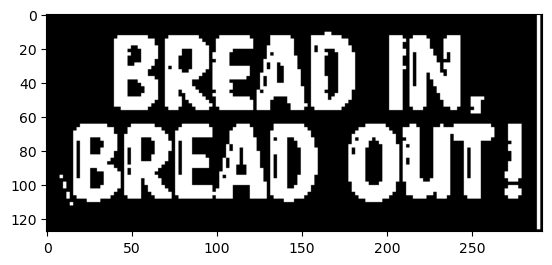

In [48]:
plt.imshow(cv2.cvtColor(image_mask, cv2.COLOR_BGR2RGB))

In [49]:
region_f = grab_region(image_mask, image_mask, contours, bndboxes, 0)

In [50]:
tensor_f = image2tensor(region_f, NET_F.input_shape[0][1:3], .1, 1.)
tensor_f.shape

(1, 64, 64, 1)

In [51]:
onehot_f = char2onehot('A', alphabet)
output_f = NET_F.predict([tensor_f, onehot_f])

1/1 [==============================] - 0s 15ms/step


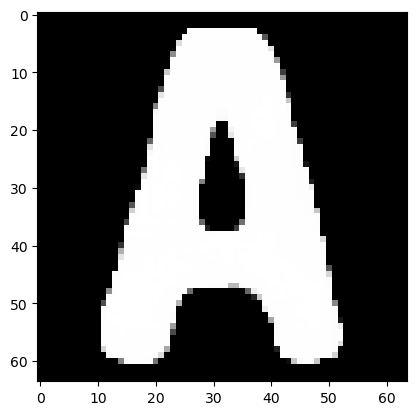

In [52]:
output_f = numpy.squeeze(output_f)
output_f = numpy.asarray(output_f, numpy.uint8)
plt.imshow(cv2.cvtColor(output_f, cv2.COLOR_BGR2RGB))

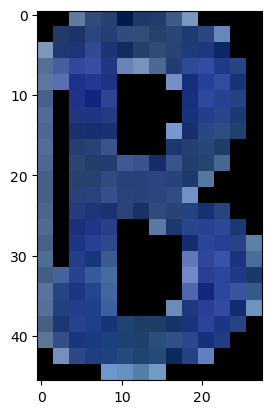

In [53]:
region_c = grab_region(img, image_mask, contours, bndboxes, index)
plt.imshow(cv2.cvtColor(region_c, cv2.COLOR_BGR2RGB))

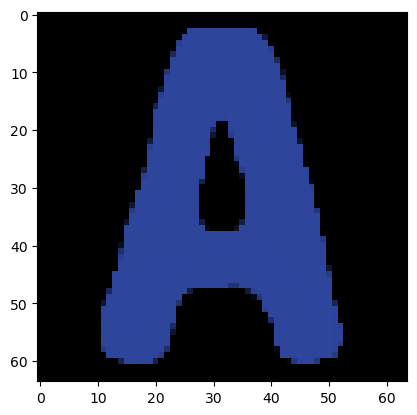

In [54]:
source_c = Image.fromarray(region_c)
target_f = Image.fromarray(output_f)
output_c = transfer_color_max(source_c, target_f)
output_c = numpy.asarray(output_c, numpy.uint8)
plt.imshow(cv2.cvtColor(output_c, cv2.COLOR_BGR2RGB))

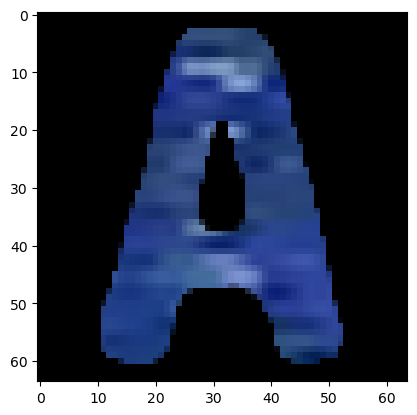

In [55]:
output_c = transfer_color_pal(source_c, target_f)
output_c = numpy.asarray(output_c, numpy.uint8)
plt.imshow(cv2.cvtColor(output_c, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 20ms/step


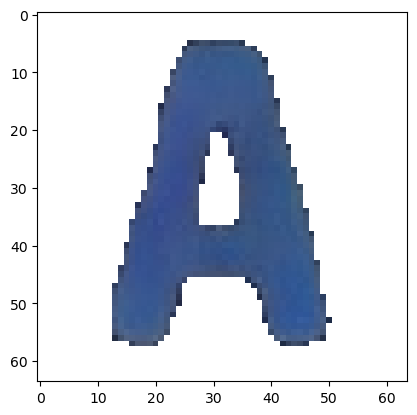

In [56]:
input1_c = image2tensor(region_c, NET_C.input_shape[0][1:3], .1, 1.)
input2_f = image2tensor(output_f, NET_C.input_shape[0][1:3], .1, 1.)
output_c = NET_C.predict([input1_c, input2_f])
output_c = numpy.squeeze(output_c)
output_c = numpy.asarray(output_c, numpy.uint8)

height, width, _ = output_c.shape
for i in range(height):
    for j in range(width):
        if output_c[i, j].sum() <= 140:
            output_c[i, j] = [255, 255, 255]
plt.imshow(cv2.cvtColor(output_c, cv2.COLOR_BGR2RGB))

# CREATING ALL ALPHABETS

.


In [57]:
alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

input_text = "SOME RANDOM TEXT HERE"

In [58]:
font_image_paths = ['Images/amul_font.png',
              'Images/amul2_font.png',
              'Images/parle_font.png', 
              'Images/brit_font.png']

font_path = font_image_paths = font_image_paths[0]
font_image = cv2.imread(font_path)

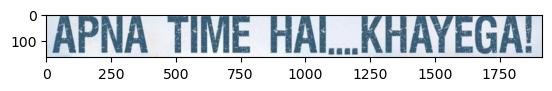

In [59]:
plt.imshow(cv2.cvtColor(font_image, cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 8ms/step


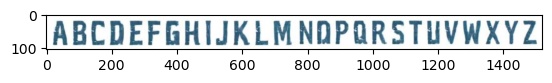

In [60]:
new_text = alphabet_with_font( font_path, alphabet )
plt.imshow(cv2.cvtColor(new_text, cv2.COLOR_BGR2RGB))

# Create Custom Text

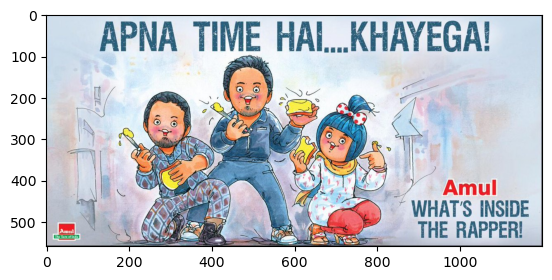

In [61]:
img = cv2.imread('Images/text_image.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

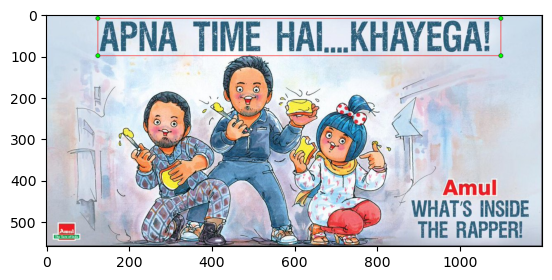

In [62]:
# Input the Points
points = [(125,10),(1100, 10),(1100, 100),(125, 100)]
plt.imshow(cv2.cvtColor(draw_region(img,points), cv2.COLOR_BGR2RGB))

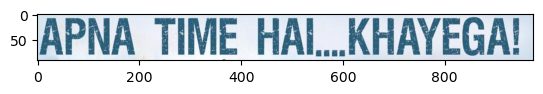

In [63]:
font_roi = extract_roi(img, points)
plt.imshow(cv2.cvtColor(font_roi, cv2.COLOR_BGR2RGB))

In [64]:
amul_font = font_roi.copy()

In [65]:
new_text = text_creator_with_font(img, points, alphabet, input_text, img_path)

1/1 [==============================] - 0s 8ms/step


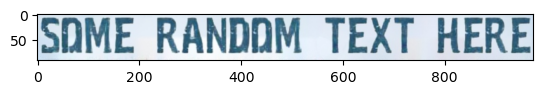

In [66]:
plt.imshow(cv2.cvtColor(new_text, cv2.COLOR_BGR2RGB))

# Initial Text Removal

In [67]:
pipeline = keras_ocr.pipeline.Pipeline()
img = keras_ocr.tools.read('Images/text_image.jpg')

Looking for /Users/karanpreetsingh/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/karanpreetsingh/.keras-ocr/crnn_kurapan.h5


1/1 [==============================] - 1s 923ms/step


<Axes: >

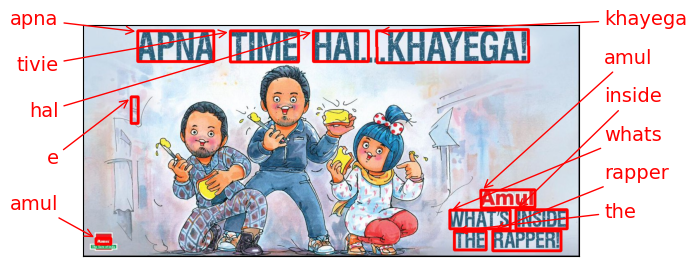

In [68]:
bounding_boxes = pipeline.recognize([img])

keras_ocr.tools.drawAnnotations(image=img, predictions=bounding_boxes[0])

Text(0.5, 1.0, 'Masked Text Image')

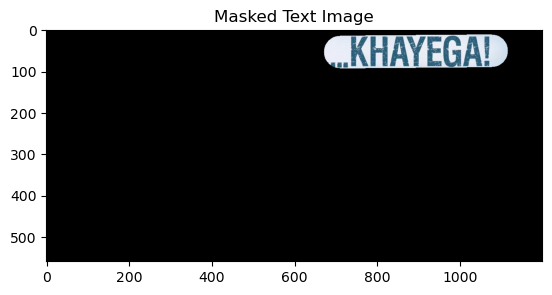

In [69]:
def midpoint(x1, y1, x2, y2):
    x_mid = int((x1 + x2)/2)
    y_mid = int((y1 + y2)/2)
    return (x_mid, y_mid)

# Try removing the word "khayega"

box = bounding_boxes[0][0]
x0, y0 = box[1][0]    # Top Left
x1, y1 = box[1][1]    # Bottom Right
x2, y2 = box[1][2]    # Top Right
x3, y3 = box[1][3]    # Bottom Left

x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))

mask = numpy.zeros(img.shape[:2], dtype="uint8")
cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)

masked = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(masked)
plt.title("Masked Text Image")

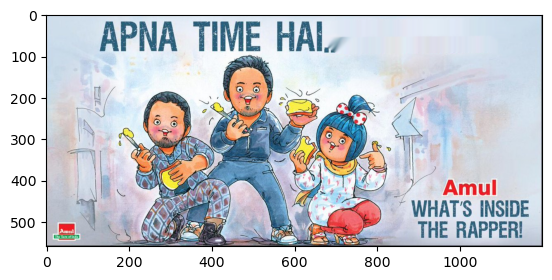

In [70]:
img_inpainted = cv2.inpaint(img, mask, 10, cv2.INPAINT_NS) #Navier-Stokes
plt.imshow(img_inpainted)

In [71]:
def inpaint_text(img, pipeline):
    
    # generate (word, box) tuples 
    bounding_boxes = pipeline.recognize([img])
    
    # define mask
    mask = numpy.zeros(img.shape[:2], dtype="uint8")
    for box in bounding_boxes[0]:
        x0, y0 = box[1][0]
        x1, y1 = box[1][1] 
        x2, y2 = box[1][2]
        x3, y3 = box[1][3] 
        
        x_mid0, y_mid0 = midpoint(x1, y1, x2, y2)
        x_mid1, y_mi1 = midpoint(x0, y0, x3, y3)
        
        thickness = int(math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 ))
        
        cv2.line(mask, (x_mid0, y_mid0), (x_mid1, y_mi1), 255, thickness)
        
    img = cv2.inpaint(img, mask, 20, cv2.INPAINT_NS)
#     img = cv2.inpaint(img, mask, 10, cv2.INPAINT_TELEA)
                 
    return(img)

In [72]:
pipeline = keras_ocr.pipeline.Pipeline()

img_path = "Images/text_image.jpg"
img = keras_ocr.tools.read(img_path)
output_textless = inpaint_text(img,pipeline)
color_textless = cv2.cvtColor(output_textless, cv2.COLOR_BGR2RGB)

Looking for /Users/karanpreetsingh/.keras-ocr/craft_mlt_25k.h5
Looking for /Users/karanpreetsingh/.keras-ocr/crnn_kurapan.h5
1/1 [==============================] - 1s 909ms/step


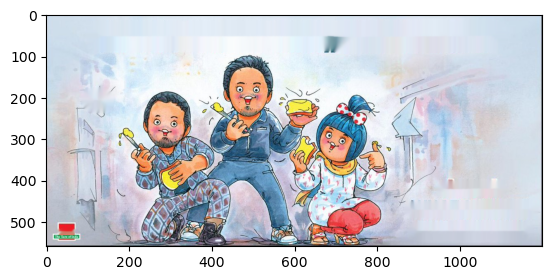

In [73]:
plt.imshow(cv2.cvtColor(color_textless, cv2.COLOR_BGR2RGB))

In [74]:
points

[(125, 10), (1100, 10), (1100, 100), (125, 100)]

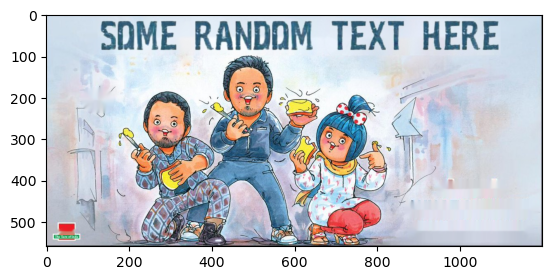

In [75]:
color_textless[10:100, 125:1100 ] = new_text
plt.imshow(cv2.cvtColor(color_textless, cv2.COLOR_BGR2RGB))

# Helper Functions

In [40]:
xyz_path = 'Images/text_image.jpg'

def binarize(image, points=None, thresh=128, maxval=255, thresh_type=0):
    
    image = image.copy()
    if not points is None and type(points) is list and len(points) > 2:
        points = sort_points(points)
        points = numpy.array(points, numpy.int64)
        mask = numpy.zeros_like(image, numpy.uint8)
        cv2.fillConvexPoly(mask, points, (255, 255, 255), cv2.LINE_AA)
        image = cv2.bitwise_and(image, mask)

    msers = cv2.MSER_create().detectRegions(image)[0]
    setyx = set()
    for region in msers:
        for point in region:
            setyx.add((point[1], point[0]))
    setyx = tuple(numpy.transpose(list(setyx)))
    mask1 = numpy.zeros(image.shape, numpy.uint8)
    mask1[setyx] = maxval

    mask2 = cv2.threshold(image, thresh, maxval, thresh_type)[1]
    image = cv2.bitwise_and(mask1, mask2)
    return image

def find_contours(image, min_area=0, sort=True):
    image = image.copy()
 
    contours = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)[0]
    
    contours = [contour for contour in contours if cv2.contourArea(contour) >= min_area]
    
    if len(contours) < 1:
        return ([], [])
    if sort:
        bndboxes = [cv2.boundingRect(contour) for contour in contours]
        contours, bndboxes = zip(*sorted(zip(contours, bndboxes), key=lambda x: x[1][0]))
    
    return contours, bndboxes


def draw_contours(image, contours, index, color=(0, 255, 0), color_mode=None):
    image = cv2.cvtColor(image, color_mode) if color_mode else image.copy()
    drawn = numpy.zeros_like(image, numpy.uint8)
    for i in range(len(contours)):
        drawn = cv2.drawContours(drawn, contours, i, (255, 255, 255), -1, cv2.LINE_AA)
    if len(contours) > 0 and index >= 0:
        drawn = cv2.drawContours(drawn, contours, index, color, -1, cv2.LINE_AA)
    image = cv2.bitwise_and(drawn, image)
    return image


def grab_region(image, bwmask, contours, bndboxes, index):
    region = numpy.zeros_like(bwmask, numpy.uint8)
    if len(contours) > 0 and len(bndboxes) > 0 and index >= 0:
        x, y, w, h = bndboxes[index]
        region = cv2.drawContours(region, contours, index, (255, 255, 255), -1, cv2.LINE_AA)
        region = region[y:y+h, x:x+w]
        bwmask = bwmask[y:y+h, x:x+w]
        bwmask = cv2.bitwise_and(region, region, mask=bwmask)
        region = image[y:y+h, x:x+w]
        region = cv2.bitwise_and(region, region, mask=bwmask)
    return region


def grab_regions(image, image_mask, contours, bndboxes):
    regions = []
    for index in range(len(bndboxes)):
        regions.append(grab_region(image, image_mask, contours, bndboxes, index))
    return regions


def image2tensor(image, shape, padding=0.0, rescale=1.0, color_mode=None):
    output = cv2.cvtColor(image, color_mode) if color_mode else image.copy()
    output = numpy.atleast_3d(output)
    rect_w = output.shape[1]
    rect_h = output.shape[0]
    sqrlen = int(numpy.ceil((1.0 + padding) * max(rect_w, rect_h)))
    sqrbox = numpy.zeros((sqrlen, sqrlen, output.shape[2]), numpy.uint8)
    rect_x = (sqrlen - rect_w) // 2
    rect_y = (sqrlen - rect_h) // 2
    sqrbox[rect_y:rect_y+rect_h, rect_x:rect_x+rect_w] = output
    output = cv2.resize(sqrbox, shape[:2])
    output = numpy.atleast_3d(output)
    output = numpy.asarray(output, numpy.float32) * rescale
    output = output.reshape((1,) + output.shape)
    return output

def char2onehot(character, alphabet):
    onehot = [0.] * len(alphabet)
    onehot[alphabet.index(character)] = 1.
    onehot = numpy.asarray(onehot, numpy.float32).reshape(1, len(alphabet), 1)
    return onehot

def transfer_color_max(source, target):
    colors = source.convert('RGB').getcolors(256*256*256)
    colors = sorted(colors, key=lambda x: x[0], reverse=True)
    maxcol = colors[0][1] if len(colors) == 1 else \
             colors[0][1] if colors[0][1] != (0, 0, 0) else \
             colors[1][1]
    output = Image.new('RGB', target.size)
    colors = Image.new('RGB', target.size, maxcol)
    output.paste(colors, (0, 0), target.convert('L'))
    return output

def resize(image, w=-1, h=-1, bbox=False):
    image = Image.fromarray(image)
    bnbox = image.getbbox() if bbox else None
    image = image.crop(bnbox) if bnbox else image
    if w <= 0 and h <= 0:
        w = image.width
        h = image.height
    elif w <= 0 and h > 0:
        w = int(image.width / image.height * h)
    elif w > 0 and h <= 0:
        h = int(image.height / image.width * w)
    else:
        pass
    image = image.resize((w, h))
    image = numpy.asarray(image, numpy.uint8)
    return image

def paste_images(image, patches, bndboxes):
    image = Image.fromarray(image)
    for patch, bndbox in zip(patches, bndboxes):
        patch = Image.fromarray(patch)
        image.paste(patch, bndbox[:2])
    image = numpy.asarray(image, numpy.uint8)
    return image

def inpaint(image, mask):
    k = numpy.ones((5, 5), numpy.uint8)
    m = cv2.dilate(mask, k, iterations=1)
    i = cv2.inpaint(image, m, 10, cv2.INPAINT_TELEA)
    return i

def transfer_color_pal(source, target):
    source = source.convert('RGB')
    src_bb = source.getbbox()
    src_bb = source.crop(src_bb) if src_bb else source.copy()
    colors = Image.new('RGB', src_bb.size)
    src_np = numpy.asarray(src_bb, numpy.uint8)
    for i in range(src_np.shape[0]):
        row_np = src_np[i].reshape(1, -1, 3)
        col_id = numpy.where(row_np == 0)[1]
        row_np = numpy.delete(row_np, col_id, axis=1)
        row_im = Image.fromarray(row_np).resize((colors.width, 1))
        colors.paste(row_im, (0, i))
    target = target.convert('L')
    colors = colors.resize(target.size)
    output = Image.new('RGB', target.size)
    output.paste(colors, (0, 0), target)
    return output

def text_creator_with_font(img, points, alphabet, input_text, img_path):
    image_scaled = img.copy()
    image_edit = image_scaled.copy()
    image_gray = cv2.cvtColor(image_scaled, cv2.COLOR_BGR2GRAY)
    image_mask = binarize(image_gray, [], thresh, 255, 0)
    contours, bndboxes = find_contours(image_mask, cntmin)
    
    region_f = grab_region(image_mask, image_mask, contours, bndboxes, 0)
    tensor_f = image2tensor(region_f, NET_F.input_shape[0][1:3], .1, 1.)
    onehot_f = char2onehot(input_text[0], alphabet)
    output_f = NET_F.predict([tensor_f, onehot_f])
    output_f = numpy.squeeze(output_f)
    output_f = numpy.asarray(output_f, numpy.uint8)
    
    region_c = grab_region(img, image_mask, contours, bndboxes, index)
    source_c = Image.fromarray(region_c)
    target_f = Image.fromarray(output_f)
    output_c = transfer_color_max(source_c, target_f)
    output_c = numpy.asarray(output_c, numpy.uint8)
    
    output_f = resize(output_f, -1, region_f.shape[0], True)
    output_c = resize(output_c, -1, region_c.shape[0], True)
    
    # inpaint old layout
    mpatches = grab_regions(image_mask, image_mask, contours, bndboxes)
    o_layout = numpy.zeros_like(image_mask, numpy.uint8)
    o_layout = paste_images(o_layout, mpatches, bndboxes)
    inpainted_image = inpaint(img, o_layout)
    
    # generate final result
    inpainted_image = Image.fromarray(inpainted_image)
    
    inpainted_image = resize_image(img_path, inpainted_image)
    
    return inpainted_image

def alphabet_with_font(img_path, alphabet):
    img = cv2.imread(xyz_path)
    input_text = alphabet
    image_scaled = img.copy()
    image_edit = image_scaled.copy()
    image_gray = cv2.cvtColor(image_scaled, cv2.COLOR_BGR2GRAY)
    image_mask = binarize(image_gray, [], thresh, 255, 0)
    contours, bndboxes = find_contours(image_mask, cntmin)
    
    region_f = grab_region(image_mask, image_mask, contours, bndboxes, 0)
    tensor_f = image2tensor(region_f, NET_F.input_shape[0][1:3], .1, 1.)
    onehot_f = char2onehot(input_text[0], alphabet)
    output_f = NET_F.predict([tensor_f, onehot_f])
    output_f = numpy.squeeze(output_f)
    output_f = numpy.asarray(output_f, numpy.uint8)
    
    region_c = grab_region(img, image_mask, contours, bndboxes, 0)
    source_c = Image.fromarray(region_c)
    target_f = Image.fromarray(output_f)
    output_c = transfer_color_max(source_c, target_f)
    output_c = numpy.asarray(output_c, numpy.uint8)
    
    output_f = resize(output_f, -1, region_f.shape[0], True)
    output_c = resize(output_c, -1, region_c.shape[0], True)

    mpatches = grab_regions(image_mask, image_mask, contours, bndboxes)
    o_layout = numpy.zeros_like(image_mask, numpy.uint8)
    o_layout = paste_images(o_layout, mpatches, bndboxes)
    inpainted_image = inpaint(img, o_layout)
    
    inpainted_image = Image.fromarray(inpainted_image)
    
    inpainted_image = resize_image(img_path, inpainted_image)
    
    return inpainted_image
